In [26]:
import pandas as pd

In [27]:
money = pd.read_excel("USD_CURRENCY.xlsx")

In [28]:
money.describe()

,nominal,curs
count,494.0,494.000000
mean,1.0,63.766919
std,0.0,3.106659
min,1.0,55.671700
25%,1.0,62.759525
50%,1.0,64.244550
75%,1.0,65.809775
max,1.0,69.974400


In [29]:
future = 7 # будем предсказывать курс на 7 дней вперед
past = 28 # используя данные о курсе за 28 дней назад

In [30]:
import sklearn

In [31]:
money

,nominal,data,curs,cdx
0,1,2018-01-10,57.0463,Доллар США
1,1,2018-01-11,56.8734,Доллар США
2,1,2018-01-12,56.9957,Доллар США
3,1,2018-01-13,56.6019,Доллар США
4,1,2018-01-16,56.3569,Доллар США
...,...,...,...,...
489,1,2019-12-26,61.7164,Доллар США
490,1,2019-12-27,61.7676,Доллар США
491,1,2019-12-28,62.0315,Доллар США
492,1,2019-12-31,61.9057,Доллар США


In [32]:
values = money.curs

In [33]:
start = past
end = len(values) - future

In [37]:
raw_data = []
for i in range(start, end):#берем только данные с которыми можно работать
    past_and_future_values = values[(i-past):(i+future)] #список из 35 элементов относительно текущей строки
    raw_data.append(list(past_and_future_values))
    

In [38]:
past_columns = []
for i in range(past):
    past_columns.append("past_{}".format(i))
 
future_columns = []
for i in range(future):
    future_columns.append("future_{}".format(i))

future_columns

['future_0',
 'future_1',
 'future_2',
 'future_3',
 'future_4',
 'future_5',
 'future_6']

In [40]:
df = pd.DataFrame(raw_data, columns = (past_columns + future_columns))
df.head()

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,57.0463,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,...,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,...,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,...,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,...,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,...,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000


In [41]:
df.shape

(459, 35)

## тренировочная выборка
нужна для обучения модели
по сути это учебник, на ней модель обучеается и знает как жить в дальнейшем

In [56]:
x = df[past_columns][:-1] #вход модели, то что для предсказания

In [57]:
y = df[future_columns][:-1]# таргет, то что мы хотим предсказать

## тестовая выборка
на ней мы проверяем качество модели, насколько хорошо она обучилась для модели 
линейной регрессии

In [54]:
x_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
LinReg = LinearRegression()

In [58]:
LinReg.fit(x,y) # обучение модели свелось к этой единственной строке(готовый алогоритм)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
prediction = LinReg.predict(x_test)[0]

In [65]:
import matplotlib.pyplot as plt

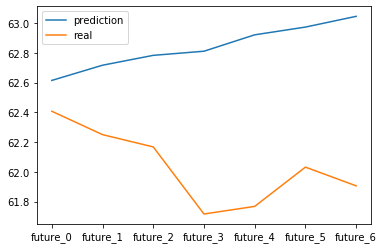

In [66]:
plt.plot(prediction, label = "prediction")
plt.plot(y_test.iloc[0], label = "real")
plt.legend()

In [67]:
from sklearn.metrics import mean_absolute_error

In [68]:
mean_absolute_error(y_test, [prediction])

0.8024480001128244

In [71]:
 from sklearn.neighbors import KNeighborsRegressor


In [82]:
KNN = KNeighborsRegressor(n_neighbors = 1)

In [83]:
KNN.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [84]:
prediction = KNN.predict(x_test)[0]

In [85]:
mean_absolute_error(y_test, [prediction])

0.17897142857142864

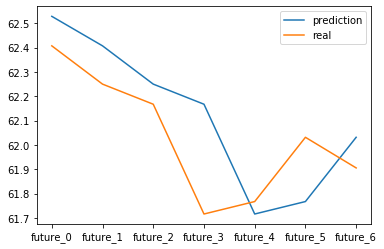

In [86]:
plt.plot(prediction, label = "prediction")
plt.plot(y_test.iloc[0], label = "real")
plt.legend()

In [87]:
from sklearn.neural_network import MLPRegressor

In [140]:
MLP = MLPRegressor(max_iter = 5000, hidden_layer_sizes = (100, 100, 100), random_state = 42)

In [141]:
MLP.fit(x,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [142]:
prediction = MLP.predict(x_test)[0]

In [143]:
mean_absolute_error(y_test, [prediction])

1.3903995319095566

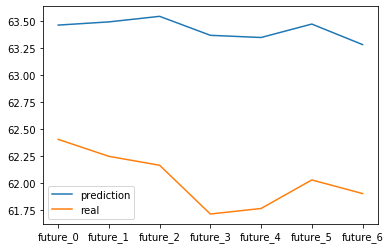

In [144]:
plt.plot(prediction, label = "prediction")
plt.plot(y_test.iloc[0], label = "real")
plt.legend()